# **Fatal Police shootings**
---
Source: [Kaggle - Database of every fatal shooting in the United States by a police officer](https://www.kaggle.com/mrmorj/data-police-shootings)

**Processed by: Guy Kahana & Anat Peled**

> This project is the secnd assignment required in *Data Science Course, Naya College* and submitted to the instructor Dror Geva.
> The project main purpose was to explore and practice the EDA process using PANDAS and MATPLOTLIB. We also used some newer packages (WordCloud, Plotly, pygal, seaborn) to plot data at the best possible way we found to fit the data presentation. 


**The Data**

In 2015, The [Washington Post](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/) began to log every fatal shooting by an on-duty police officer in the United States. In that time there have been more than 5,400 such shootings recorded by The Post. 
The Post’s data relies primarily on news accounts, social media postings and police reports.
In this notebook we used the most current dataset (taken directly from The Post, updated 04.08.2020) as the metadata.

The dataset is a tabular data, mainly constructed of categorical attributes. The 'age' attribute is the only linear numeric attribute in the file. In this notebook we explore each attribute in the data set, present it and mark our findings. Both internal and external links are explored where relevant.


In [ ]:
# Installation of Plotly with geographical maps
# ----------------------------------------------
# !pip install plotly==4.9.0
# !pip install plotly plotly-geo==1.0.0
# !pip install plotly chart-studio==1.0.0
# !pip install -U kaleido

# Installation of pygal
# ----------------------------------------------
#!pip install pygal

In [ ]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.pyplot import figure
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.graph_objs as go #importing graphical objects
import plotly.express as px
import plotly.graph_objects as go
import pygal
from pygal.style import LightSolarizedStyle
from IPython.display import SVG, HTML
%matplotlib inline

# **Preliminaries**
---

In [ ]:
from google.colab import drive
drive.mount('/gdrive/')

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).


In [ ]:
# In Google Drive: Click the folder and choose "Add to My Drive". It will create a symlink.
my_path = '/gdrive/My Drive/Guy & Anat'
#my_path = '/gdrive/My Drive/Class Materials/EDA Project/Guy & Anat'
# Import the .CSV file
data = pd.read_csv(my_path+'/fatal-police-shootings-data.csv', parse_dates=['date'], index_col='id')

# **Data Overview**
---

## **Overview**

In [ ]:
# Looking at 25/05/2020 - the date of George Perry Floyd Jr. died in Minnesota from police brutality (but wasn't shot...)
data[data['date']=='2020-05-25']

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
id,,,,,,,,,,,,,
5837,Gary P. Dorton,2020-05-25,shot,knife,43.0,M,NaN,Jonesborough,TN,True,attack,Not fleeing,False
5839,Joe Louis Castillanos,2020-05-25,shot,gun,38.0,M,H,Houston,TX,False,attack,Not fleeing,False
5841,Dion Johnson,2020-05-25,shot,undetermined,28.0,M,B,Phoenix,AZ,False,undetermined,Not fleeing,False
5884,Reymar Gagarin,2020-05-25,shot,toy weapon,35.0,M,NaN,Modesto,CA,True,attack,Not fleeing,True
5885,Justin Mink,2020-05-25,shot,knife,33.0,M,NaN,League City,TX,False,attack,Not fleeing,False


In [ ]:
data.shape

(5495, 13)

In [ ]:
data.dtypes

name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
dtype: object

##**Missing Values**
Missing values are present at 5 out of 13 columns in the dataset, with a relatively small amounts:

* One missing value of 'gender' was filled as 'M'
* 'Armed', 'Race' & 'Flee' will are filled with 'Unknown'
* The 242 null values in 'Age' left as nulls.

In [ ]:
# Missing values?
data.isnull().sum()

name                         0
date                         0
manner_of_death              0
armed                      212
age                        242
gender                       1
race                       554
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       258
body_camera                  0
dtype: int64

In [ ]:
# Fill 1 missing value for Gender as Male
data['gender'].fillna('M', inplace=True)

# Fill Armed, Race & Flee as unknowns
data.fillna({'armed': 'Unknown', 'race': 'Unknown', 'flee': 'Unknown'}, inplace = True) 

##**Duplicates**

At a first glance, there are no fully-duplicate rows in the data. But since the data is loaded with 'TK TK' as names and 'Unknown' values, we will check the presence of a duplicate by the combination of: date, gender, race, state & city.



This reveals 16 pairs of suspected duplicate. But almost all pairs has its unique name. only one pair (3364 & 4246) seems as an actual duplicate and differ only with the flee value. Since it is just one value, we made a decision to keep the rows intact. 


In [ ]:
# Searching for identical lines
data.duplicated().sum()

0

In [ ]:
# Serching semi-duplicates
MDuplicates = data.loc[data.duplicated(subset=['date', 'gender', 'race', 'state', 'city'], keep=False)]
data[data.index.isin(['3364', '4246'])]

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
id,,,,,,,,,,,,,
3364,TK TK,2018-01-29,shot,knife,46.0,M,H,Houston,TX,False,attack,Car,False
4246,Mark Renee Flores,2018-01-29,shot,knife,46.0,M,H,Houston,TX,False,attack,Not fleeing,False


#**Data Inspection**
---

## **Date** 

Each line in the data has a date stamp. In order to analyze the data we added few more datetime attributes: Year, Month, Day, Day of Week, # Day of week, and a string concating the year and month.

###Year
Looking at the timeline we can see there is almost a flat line representing the number of deaths over the years.
There is a decrease in the incidents number at 2016, possibly due to the presidential election year. Further investigation is required in 2021 to establish a possible connection.


In [ ]:
#@title  { form-width: "1%" }
#Adding year to data
data['Year']=data['date'].dt.year
#Adding month to data
data['Month']=data['date'].dt.month
#Adding Day to data
data['Day']=data['date'].dt.day
#Adding Dayofweek to data
data['Dayofweek']=data['date'].dt.day_name()
#Adding numDayofweek to data
data['numDayofweek']=data['date'].dt.dayofweek
##Adding year to month
data['Year_month']=data['Year'].astype(str)+'/'+data['Month'].astype(str)

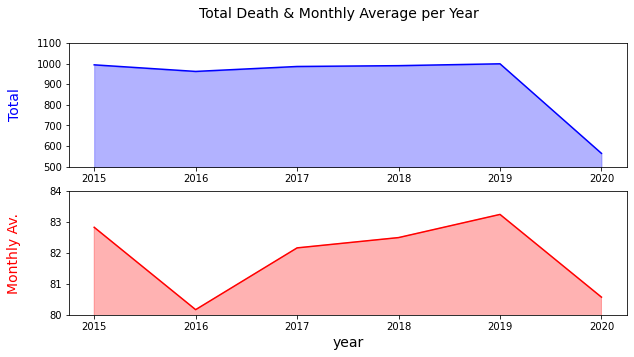

In [ ]:
#@title  { form-width: "1%" }
# Plotting Total Death Cases per Year
fig, ax = plt.subplots(2, 1, figsize=(10, 5))
fig.suptitle('Total Death & Monthly Average per Year', fontsize=14)
x = pd.Series(['2015','2016','2017','2018','2019','2020'])

# Subplot 1 - Total Death
y1 = data.groupby(['Year'])['name'].count()
ax[0].plot(x, y1, color='blue')
ax[0].fill_between(x, 0, y1, color='blue', alpha=0.3)
ax[0].set_ylabel("Total",color='blue',fontsize=14)
ax[0].yaxis.labelpad = 15
ax[0].set_ylim([500, 1100])


# Subplot 2 - Monthly Average
y2 = data.groupby(['Year', 'Month'])['name'].count().unstack('Year').mean(axis=0)
ax[1].plot(x, y2, color='red')
ax[1].fill_between(x, 0, y2, color='red', alpha=0.3)
ax[1].set_ylabel("Monthly Av.",color="red",fontsize=14)
ax[1].set_xlabel("year",fontsize=14)
ax[1].set_ylim([80, 84])
ax[1].yaxis.labelpad = 28

plt.show()

###Month
The monthly average is also steady. It seems like 2020 has no significant change in number Of deaths.

According to the data below we can see that the 1st quarter had more incidents.
>
There is also an unexplained decline in September.

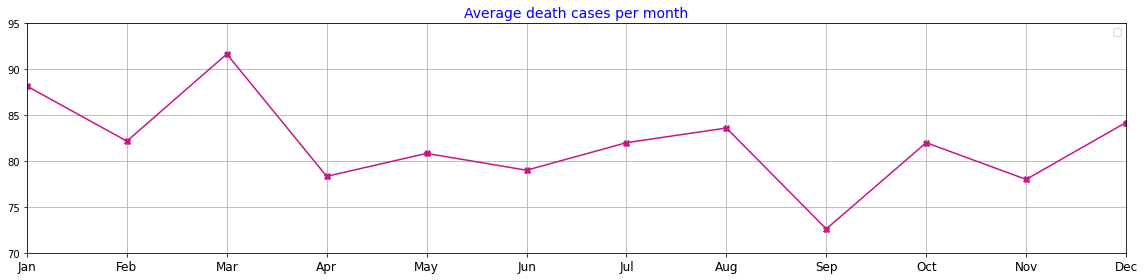

In [ ]:
#@title  { form-width: "1%" } 

a = data.groupby(['Month','Year'])['name'].count().to_frame().unstack('Year').mean(axis=1).to_frame()
month = pd.Series(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
fig, ax = plt.subplots(figsize=(16, 4))
plt.plot(month, a.values, color='mediumvioletred', marker="X")
ax.grid(True)
ax.set_xticklabels(labels=month, fontsize=12)
ax.set_ylim(70, 95, 5)
ax.set_xlim('Jan', 'Dec')
ax.legend(labels='')
plt.title(label='Average death cases per month',  fontsize=14, color = 'b')
plt.tight_layout()
plt.show()

###Day of Week
It seems like there are more deaths in the middle of the week. Approximately 10% more.

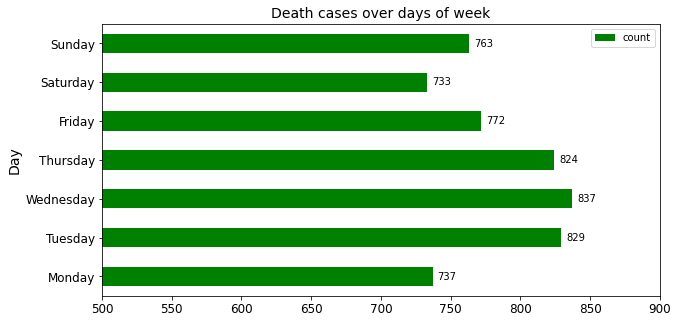

In [ ]:
#@title  { form-width: "1%" }
dayofweek=data.groupby(['numDayofweek','Dayofweek'])['name'].count().rename('count').reset_index()
ax=dayofweek.plot(kind='barh',x='Dayofweek',y='count',linewidth=4,linestyle=':',color='green',figsize=(10, 5))
plt.title(label='Death cases over days of week', fontsize=14)
plt.legend(loc='best')
ax.set_xlim([500, 900])
ax.tick_params(labelsize=12)
ax.set_ylabel(ylabel='Day', fontsize=14)
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = x_value

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.


plt.show()

## **Name** 

The most common name in the data is TK TK: ~3% from data. In journalism, [it means](https://en.wikipedia.org/wiki/To_come_(publishing)) that the data is unknown at the publicity time.

> Indented block





```
# This is formatted as code
```

##**Manner of Death** 

There are two values for this attribute: Shot or Shot & Tasered. 
>
The annual precenege of shot and Tasered (~5.0%) remains constant throuout the years.
>
Eventhough taser is less-lethal and we could excpect the police to use it more oftenly this is not the case.
 


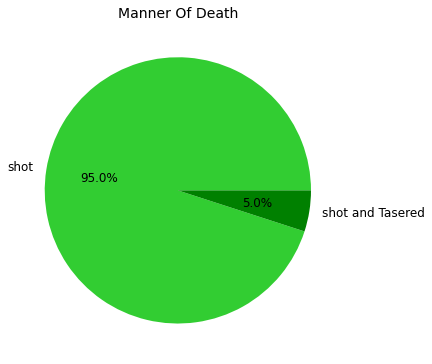

In [ ]:
#@title  { form-width: "1%" }
#group by manner_of_death to find relations
df_manner_of_death=data.groupby('manner_of_death')['name'].count().sort_values(ascending=False)

fig, ax= plt.subplots(figsize=(6,6))
ax = df_manner_of_death.plot.pie(labels=data['manner_of_death'].unique(),
                                 autopct='%1.1f%%', 
                                 colors=['limegreen','green'],
                                 fontsize=12)
plt.title(label='Manner Of Death', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

##**Armed**

* For this column there are 3.86% percente NAN values in the data.
>
* In this specific column there is  a list of 93 armed options.
>
* We decided to divide in into three sub group: 'Hot' or 'Cold' weapon or unarmed.
>
* looking at these groups - the population is divided neearly equaly between hot and cold weapon: *50*%  for each group with tendency for Hot weapon.

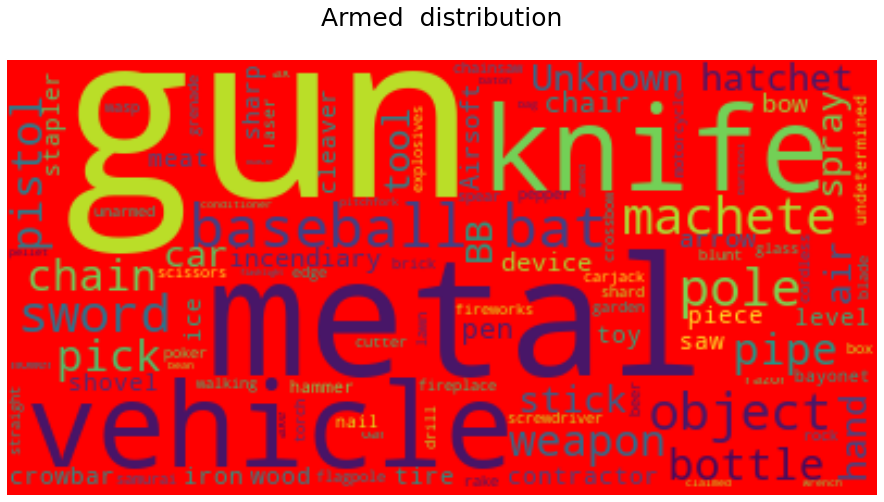

In [ ]:
#@title  { form-width: "1%" }
text=data['armed'].rename("armed").reset_index()
text=text['armed'].dropna().rename("armed").reset_index()
text=list(text['armed'])
[s.strip().replace("'",'') for s in text]
text=set(text)
# # # ##Create and generate a word cloud image:
wordcloud = WordCloud(regexp=r"\w[\w]+" , background_color="red").generate(str(text))
plt.figure(figsize=(20, 8))
plt.title('Armed  distribution\n', size=25)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

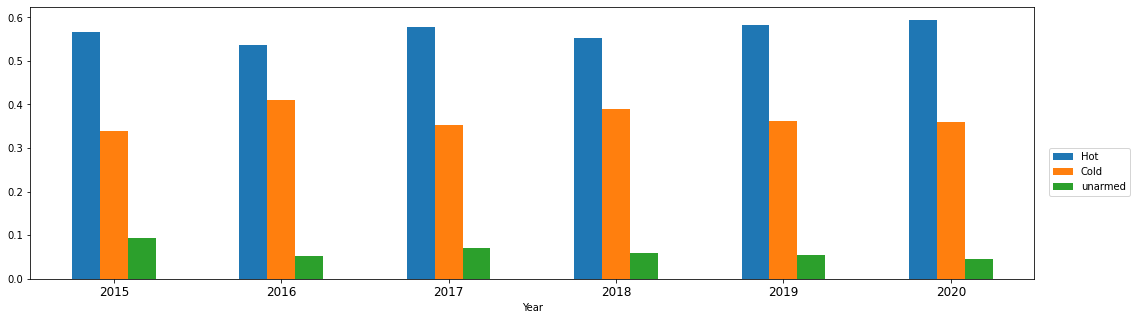

In [ ]:
#@title  { form-width: "1%" }
def armed(grp):
  if grp in ('gun','pistol'):
    return 'Hot'
  elif grp in ('unarmed'):
    return 'unarmed'
  else:
    return 'Cold'
#adding field to seperate HOT WEAPON from ALL POP
data['Hot_Cold_weapon']=data['armed'].apply(lambda grp: armed(grp))
#hot cold weapoon 
df_Hot_Cold_weapon=data.groupby(['Year','Hot_Cold_weapon'])['name'].count().rename('count').reset_index()
df_Hot_Cold_weapon_sort=df_Hot_Cold_weapon.sort_values(by=['Year','count'],ascending=False)
#Pivot manner_of_death per year
df_Hot_Cold_weapon_sort_pivot=df_Hot_Cold_weapon.pivot_table(index='Year',columns='Hot_Cold_weapon',values='count',aggfunc=sum,margins=True, 
                       dropna=True, fill_value=0)

#the percentage of manner_of_death per year from All population per year
d=df_Hot_Cold_weapon_sort_pivot.div( df_Hot_Cold_weapon_sort_pivot.iloc[:,-1], axis=0)
d=d[:-1].reset_index()
ax = d[['Year','Hot','Cold','unarmed']].plot(kind='bar',stacked=False,x='Year',figsize=(18,5))
ax.set_xticklabels(labels = d['Year'].unique(), rotation=0, ha='center', fontsize=12)
plt.legend(bbox_to_anchor=(1.1, 0.5))
plt.show()

##**Age**

* For column "Age" There are 4.40% percente NAN values in the data

>
* The majority of deaths (60%) occurs at the age group of 30-60.
> 
* there are a very few cases where the age was below 10 and above 90.
> 
* intresting to find out what happand in this cases and if this cases are real.




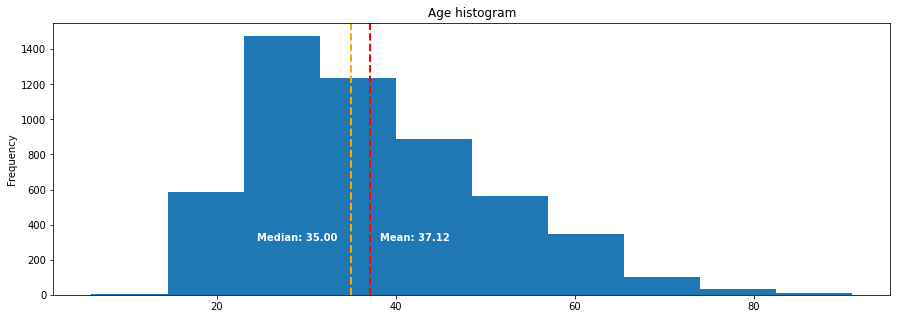

In [ ]:
#@title  { form-width: "1%" }
ax1 = data['age'].plot(kind='hist',bins=10, figsize=(15, 5))
ax1.axvline(x=data['age'].mean(), ymin=0, ymax=1, color='red', linewidth=2, linestyle='dashed')
ax1.axvline(x=data['age'].median(), ymin=0, ymax=1, color='orange', linewidth=2, linestyle='dashed')
min_ylim, max_ylim = plt.ylim()
plt.text(data['age'].mean()*1.03, max_ylim*0.2, 'Mean: {:.2f}'.format(data['age'].mean()), color='w', weight='bold')
plt.text(data['age'].median()*0.7, max_ylim*0.2, 'Median: {:.2f}'.format(data['age'].median()), color='w', weight='bold')

plt.title(label='Age histogram', fontsize=12)
plt.show()

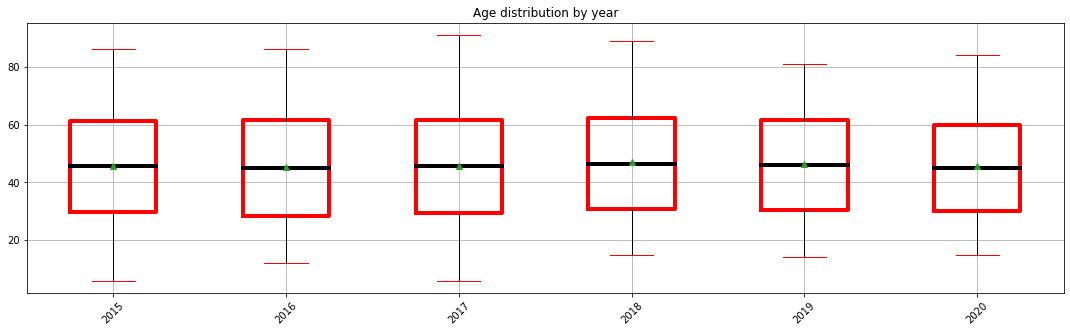

In [ ]:
#@title  { form-width: "1%" }
boxprops = dict(linestyle='-', linewidth=4, color='r')
medianprops = dict(linestyle='-', linewidth=4, color='r')
z = data.groupby(['Year','age'])['name'].count().rename('count').reset_index()
ax=z.boxplot(by='Year',color=dict(boxes='r',whiskers='k', medians='k',caps='r'),
             grid=True,column='age',rot=45,
             showfliers=False, showmeans=True,
             boxprops=boxprops,                                                                                    
             medianprops=medianprops,
             figsize=(18,5))
plt.suptitle("")
ax.set_xlabel("")
ax.set_title("Age distribution by year")
plt.show()

## **Gender**

* There are 0.02% percents NAN values in the data
>
* Male gender is the majority the death ocurenses.
>
* Throughout the years there is no change in this balance






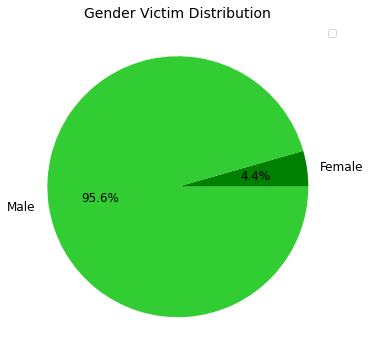

In [ ]:
#@title  { form-width: "1%" }
#group by gender to find relations
df_gender=data.groupby('gender')['name'].count().rename('count').reset_index()
ax = df_gender.plot.pie(y='count',labels=['Female','Male'],
                   autopct='%1.1f%%',
                   colors=['green','limegreen'],
                   figsize=(6,6), fontsize=12)
ax.set_title("Gender Victim Distribution", fontsize=14)
ax.legend(labels='')
plt.ylabel('')
plt.show()

##**Race**

For column "race" There are 10.08% percente NAN values in the data

As shown below , If you are a black person there is 3 times bigger 
chance you will get killed by a police officer than a white guy. Eventhough Black people are only 13% of the US population


In [ ]:
#@title  { form-width: "1%" }
race_data = pd.read_csv(my_path+'/Race distrebution 2017.csv')
race_data=race_data.rename(columns={'RaceCode':'race'})
df_race=data.groupby(['race'])['name'].count().rename('count').reset_index()
df_race=df_race[~df_race['race'].isin(['N','A','Unknown'])]
d=df_race.sort_values(by=['race','count'],ascending=False)
d['Percentage']=d['count']/d['count'].sum()
d['Percentage']=d['Percentage'].map(lambda n: '{:,.2%}'.format(n))
d=d.drop_duplicates()
d=pd.merge(d.reset_index(), race_data.reset_index(), on=['race'], how='left')
d['normelized']=d['count']/d['Quantity']*100000
d.sort_values(by='normelized',inplace=True)
colors = ['lightslategray',] * 5
colors[3] = 'crimson'
fig = go.Figure(data=[go.Bar(x=d['race'],y=d['normelized'],width=[1, 2, 0.9, 1])])
fig.update_layout(title="Race Death Normaliztion per # in Population",
    xaxis_title="Race",
    xaxis = dict(tickmode = 'array',
                 tickvals = ['B', 'H', 'W', 'O'],
                 ticktext = ['Black','Hispanic','White','Other']),
    yaxis_title="Deaths per 100,000")

fig.update_traces(marker_color=colors, marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()

## **State**

Analyzing the distribution of incidents per state, California is by far the most perdominant state in this dataset. However, this first three states in the sorted data are California, Texas & Florida, are also the most populated states in the US. 

Therefore we also normalized the data per state per 100,000, using the 2019 population data from 2019 estimation data of the US Census Bureu. In this scenario Alaska, with only 731,545 population, is now leading the list with more than 5 incidenets per 100,000. 

For the complete data table refer to [State Population Totals and Components of Change: 2010-2019](https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html), *Annual Estimates of the Resident Population for the United States, Regions, States, and Puerto Rico: April 1, 2010 to July 1, 2019*

Notice that although there are officially 50 states in the US, there are 51 'states' in the list of states in this dataframe. the additional state is the District of Columbia (DC) also known as **Washington D.C**.

In [ ]:
#@title  { form-width: "1%" }
pop = pd.read_csv(my_path+'/USpop2019.csv',thousands=',')

# merge the data of population according to state abbervation
data = pd.merge(data, pop)

# calculate the value of normalized incidents per 100,000 population for each row
data['incidents'] = data.groupby('state')['state'].transform('count')
data['state_norm'] = data['incidents'] / data['2019'] * 50000

In [ ]:
#@title  { form-width: "1%" }
state_data = data.copy()

fig = go.Figure(data=go.Choropleth(
    locations= state_data['state'], # Spatial coordinates
    z = state_data['incidents'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "# incidents",
))

fig.update_layout(
    title_text = 'Incidents By state: Choropleth',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [ ]:
#@title  { form-width: "1%" }
fig = go.Figure(data=go.Choropleth(
    locations= state_data['state'], # Spatial coordinates
    z = state_data['state_norm'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "# incidents\n per 50,000",
))

fig.update_layout(
    title_text = 'Incidents By state: Normalized by Popultion Choropleth',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

## **City**

Here, too, we used an external data to normalize the data per city per 100,000 population for cities with more than 50,000 residents, using the 2019 estimation data of the US Census Bureu.
For the complete data table refer to [City and Town Population Totals: 2010-2019](https://www.census.gov/data/tables/time-series/demo/popest/2010s-total-cities-and-towns.html), *Annual Estimates of the Resident Population for Incorporated Places of 50,000 or More, Ranked by July 1, 2019 Population: April 1, 2010 to July 1, 2019*

In [ ]:
#@title  { form-width: "1%" }

# Import the .CSV file
city_pop = pd.read_csv(my_path+'/CityPop2019.csv',thousands=',', header=0, names = ['City and State', '2019c'])
city_pop['city'] = ''

# Seperate city & state columns from the combined field to 2 new columns
def split_city(rec):
  return rec.split(',')[0].strip()

def split_state(rec):
  return rec.split(',')[1].strip()

city_pop['city'] = list(map(split_city, city_pop['City and State']))
city_pop['city'] = city_pop['city'].str.replace('.city$','')
city_pop['state_name'] = list(map(split_state, city_pop['City and State']))
city_pop.drop('City and State', axis=1, inplace=True)

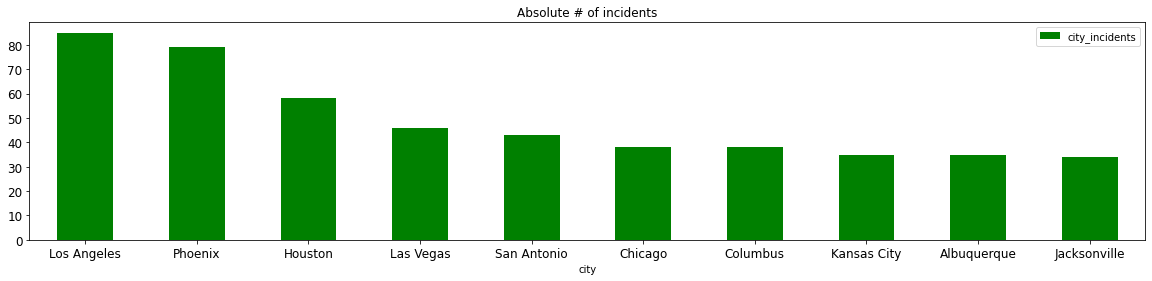

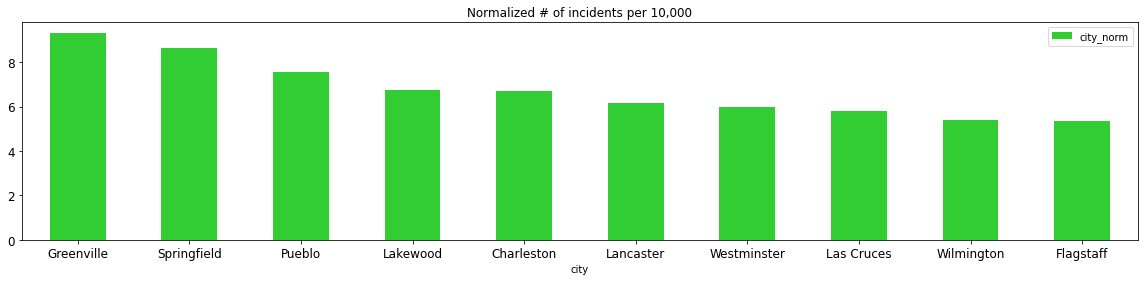

In [ ]:
#@title  { form-width: "1%" }
# merge the data of population according to state name
city_data = pd.merge(data, city_pop, on=['city','state_name'], how='left')
city_data.head(2)

# calculate the value of normalized incidents per 10,000 population for each row
city_data['city_incidents'] = city_data.groupby('city')['city'].transform('count')
city_data['city_norm'] = city_data['city_incidents'] / city_data['2019c'] * 50000

# Plot the absolute graph of incidents states
total = pd.pivot_table(city_data, values='city_incidents',index='city').sort_values(by='city_incidents', ascending=False).head(10)
ax1 = total.plot(kind='bar', figsize = (20, 4),
                 title='Absolute # of incidents',
                 color='green', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, ha='center')

# Plot the normalized graph of incidents states
relative = pd.pivot_table(city_data, values='city_norm', index='city').sort_values(by='city_norm', ascending=False).head(10)
ax2 = relative.plot(kind='bar', figsize = (20, 4),
                    title='Normalized # of incidents per 10,000',
                    color = 'limegreen', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, ha='center')
plt.show()

There are 2820 unique cities in this attribute - an average of less than 2 incidents per city as shown in the histogram below. 

Looking at the absolute values of the first 20 cities, there are more than 20 cases for each. This means that a lot of cities has only 1 incident per city.

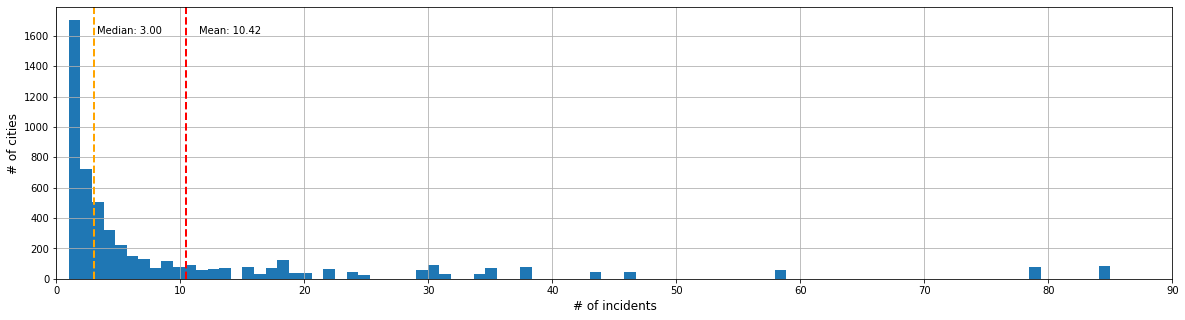

In [ ]:
#@title  { form-width: "1%" }
fig, ax1 = plt.subplots(figsize=(20,5))
ax1 = city_data.city_incidents.T.hist(bins=90)
ax1.set_xlabel('# of incidents', fontsize=12)
ax1.set_ylabel('# of cities', fontsize=12)
ax1.set_xlim(0,90)
ax1.set_xticklabels(labels=range(0,91,10))
ax1.axvline(x=city_data.city_incidents.mean(), ymin=0, ymax=1, color='red', linewidth=2, linestyle='dashed')
ax1.axvline(x=city_data.city_incidents.median(), ymin=0, ymax=1, color='orange', linewidth=2, linestyle='dashed')
min_ylim, max_ylim = plt.ylim()
plt.text(city_data.city_incidents.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(city_data.city_incidents.mean()))
plt.text(city_data.city_incidents.median()*1.1, max_ylim*0.9, 'Median: {:.2f}'.format(city_data.city_incidents.median()))
plt.show()

##**Signs of mental illness**

[According to the NIH](https://www.nimh.nih.gov/health/statistics/mental-illness.shtml) (National Institute of Mental Illness) the prevalence of Any Mental Illnes (AMI) is 18.9% of all U.S. adults, while the prevalence of (Serious Mental Illness) SMI is 4.5% of all U.S. adults. 
The prevalence of mental illness among fatal shooting is 22.3% in average, but a slightly annual decrease can be observed (keep in mind that 2020 has partial data).

The high precentage can be due to equivalent categorizing such as AMI (i.e - whoever takes anti-depressants is suffering from mental illness) or maybe the presence of 'Suicide by cop' due to major depression.
The slight decline is expected since the police officers are probably trained better each year to deal will mentally illed people.  


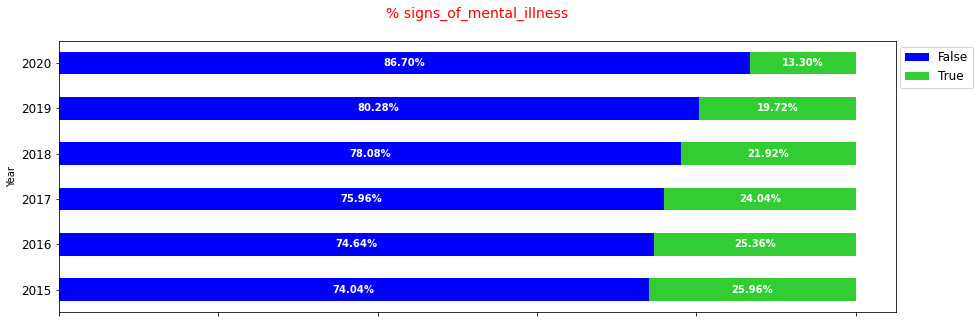

In [ ]:
#@title  { form-width: "1%" }
# Ploting a bar chart of the attribute
table = pd.crosstab(data['Year'], data['signs_of_mental_illness'], normalize=0)
ax = table.plot(kind='barh',stacked=True, color=['blue','limegreen'], figsize=(15, 5))

labels = []
for j in table.columns:
    for i in table.index:
        label = str('{0:.2%}'.format(table.loc[i][j]))
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', color='white', weight='bold')

ax.set_xticklabels(labels='')
ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=12)

plt.legend(loc='best')
plt.title('% signs_of_mental_illness\n', fontsize=14, color='r')
plt.legend(bbox_to_anchor=(1.1, 1.0), fontsize=12)
plt.show()

##**Threat level**

This column is made of 3 categories ([Additional reading](https://www.washingtonpost.com/sf/investigative/2015/10/24/on-duty-under-fire/)):
1. *Attack (~65%)*: there was direct and immediate threat to life. That would include incidents where officers or others were shot at, threatened with a gun, attacked with other weapons or physical force, etc. This is the highest level of threat
2. *Other (~31%)*: incidents where officers or others faced significant threats. These shootings were most commonly of individuals who brandished knives and refused to drop them.
3. *undetermined (~4%)*: all other incidents.


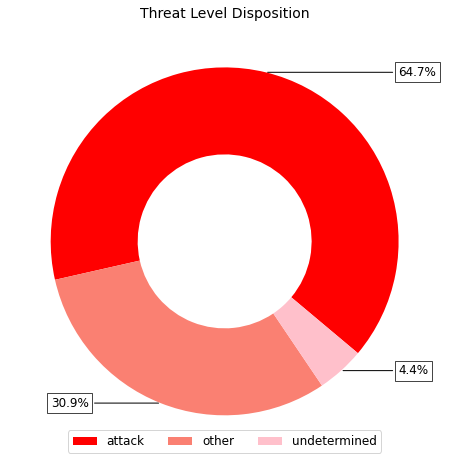

In [ ]:
#@title  { form-width: "1%" }
table = data.groupby('threat_level')['name'].count()
total = table.values.sum()
labels = ['{0:.1%}'.format(i/total) for i in table.values]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(table, wedgeprops=dict(width=0.5), startangle=-40, colors=['r','salmon','pink'])
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    ax.annotate(labels[i], xy=(x, y), xytext=(np.sign(x), y), fontsize=12, **kw)


ax.legend(wedges, table.index,
          ncol = 3,
          loc="lower center",
          fontsize=12)

ax.set_title("Threat Level Disposition", fontsize=14)
plt.show()

##**Flee**

There are initially 4 categories of flee: Not fleeing, Car, Foot and Other. In almost 60% of incidents, a flee wasn't recorded. That means that in most casese there was a face-to-face conflict.

There are 258 records with no data for this attribute. 
We decided to set it as a fifth categoty - Unknown.

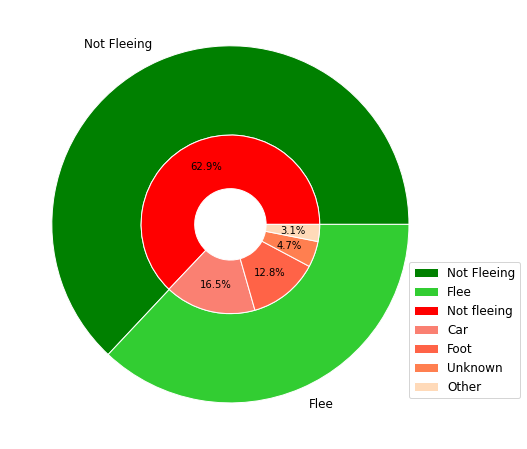

In [ ]:
#@title  { form-width: "1%" }
# Inplace replacing nan values with Unknown.
data['flee'].fillna('Unknown', inplace=True)
c =  data['flee'].value_counts(normalize=True).to_frame().T

# Plot the double donut pie 
fig, ax = plt.subplots(figsize=(8,8))
plt.axis('equal')

all_val = [c.iloc[0][i] for i in c]
ax1 = plt.pie([0.63, 0.37], radius=1,
        colors=['green', 'limegreen'],
        pctdistance=0.7,
        wedgeprops=dict(width=0.5, edgecolor='white'),
        labels=['Not Fleeing', 'Flee'],
        textprops={'fontsize': 12})

ax2 = plt.pie(all_val, radius=0.5,
        colors=['red','salmon','tomato','coral','peachpuff'],
        wedgeprops=dict(width=0.3, edgecolor='white'),
        autopct='%.1f%%',
        pctdistance=0.7, 
        labeldistance=0.7)

handles, labels = ax.get_legend_handles_labels()
leg_labels = ['Not Fleeing', 'Flee', 'Not fleeing', 'Car', 'Foot', 'Unknown', 'Other']
plt.legend(labels=leg_labels, loc=(0.9, 0.1), fontsize=12)
plt.show()

##**Body Camera**

* A boolean attribute, indicating whether the news report has indicated an officer was wearing a body camera and it may have recorded some portion of the incident. 
* In the vast majority of incidents, a body camera was *NOT* documented.
* It doesn't necessary mean that the police officer didn't have a camera, but either it wasn't documented in the news report or the camera was OFF during the all event.
* Currently, only NV & SC require all law enforcement agencies to use the cameras. Yet, the expectation for higher percerntage doesn't meet.
* This data arouse susepicion of police bias. 

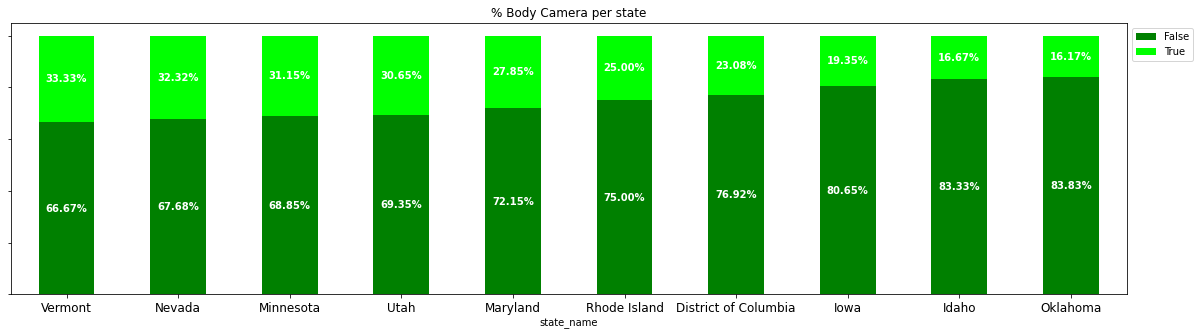

In [ ]:
#@title  { form-width: "1%" }
# plot a normalized bar by state
e = pd.crosstab(data.state_name, data.body_camera, margins=True, normalize='index').sort_values(by=False, ascending=True).head(10)
ax = e.plot.bar(stacked=True, figsize = (20, 5),
                 title = '% Body Camera per state', 
                 color=['green', 'lime'],
                 fontsize=12)

labels = []
for j in e.columns:
    for i in e.index:
        label = str('{0:.2%}'.format(e.loc[i][j]))
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', color='white', weight='bold')

ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(labels='')

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

# **Visualizations**

### **Age vs. Race-Gender** 
* Female \ Male ratio is biggest in the white population
* Asian, Native american and other minorities women in general are not involved it fatal shooting incidents

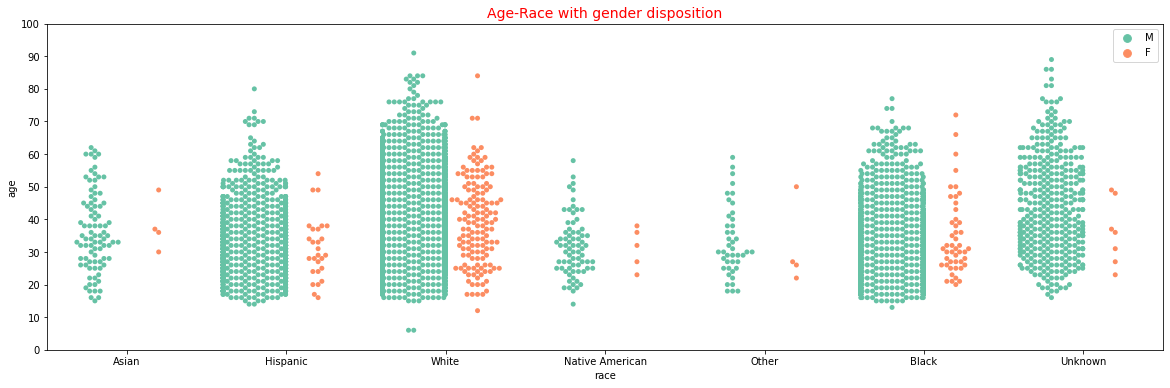

In [ ]:
#@title
# Creating a subset
a = data[['state_name','age', 'race', 'gender']]

# Plotting swarmplot
fig, ax = plt.subplots(figsize=(20,6))
plt.title('Age-Race with gender disposition', fontsize=14, color='r')
ax = sns.swarmplot(x="race", y="age", hue="gender",palette="Set2", dodge=True, data=a)
ax.set_xticklabels(labels=['Asian','Hispanic','White','Native American','Other','Black','Unknown'])
ax.set_yticks(ticks=np.arange(0,101,10))
plt.legend()
fig.show()

###**Armed VS Flee**


*   Seems like there is no strong connection between Armed and Fleeing
*   There ara more not fleeing and unarmed that where shot than fleeing and unarmed






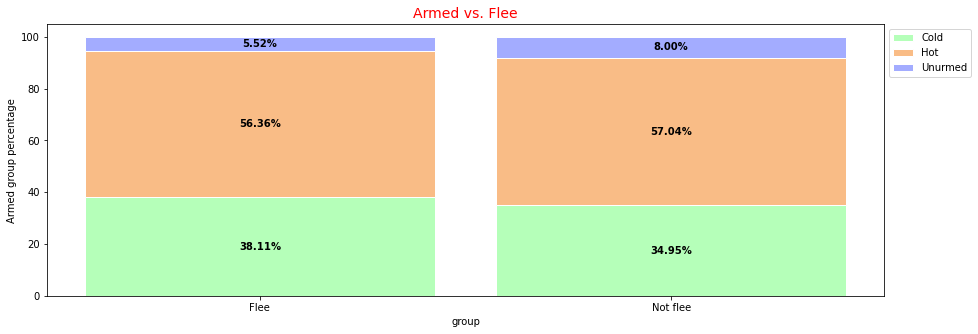

In [ ]:
#@title  { form-width: "1%" }
def flee(grp):
  if grp in ('Not fleeing'):
    return 0
  else:
    return 1

data['flee_grp']=data['flee'].apply(lambda grp: flee(grp))

df=data.groupby(['Hot_Cold_weapon','flee_grp'])['name'].count().rename('count').reset_index()
fig, ax = plt.subplots(figsize=(15, 5))
greenBars=list(df.loc[df['Hot_Cold_weapon']=='Cold']['count'])
orangeBars=list(df.loc[df['Hot_Cold_weapon']=='Hot']['count'])
blueBars=list(df.loc[df['Hot_Cold_weapon']=='unarmed']['count'])

## Data
r = [0,1]
raw_data = {'greenBars':greenBars, 'orangeBars': orangeBars,'blueBars':blueBars}
df = pd.DataFrame(raw_data)
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]

# plot
barWidth = 0.85
names = ('Flee','Not flee')
# Create green Bars
ax1=plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label='Cold')
# Create orange Bars
ax2=plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label='Hot')
# Create blue Bars
ax3=plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth, label='Unurmed')

plt.ylabel("Armed group percentage")
for r1, r2, r3 in zip(ax1, ax2, ax3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2.,
             "{:.2%}".format(h1/100), ha="center", va="center",
             color="black", fontsize=10, fontweight="bold" )
    plt.text(r2.get_x() + r2.get_width() / 2.,
             h1 + h2 / 2., "{:.2%}".format(h2/100), ha="center", va="center",
             color="black", fontsize=10, fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() / 2.,
             h1 + h2 + h3 / 2., "{:.2%}".format(h3/100), ha="center", va="center",
             color="black", fontsize=10, fontweight="bold")
#################################################
# # Custom x axis

plt.xticks(r, names)
plt.xlabel("group")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Armed vs. Flee', fontsize=14, color='r')
# Show graphic
plt.show()

###**Mental illness - Men vs. Women**
* Male's age disposition doesn't change as a function of level of threat in the presence of mental illness.

* Female's age disposition does seems to change among the mental illness group in ALL threat levels

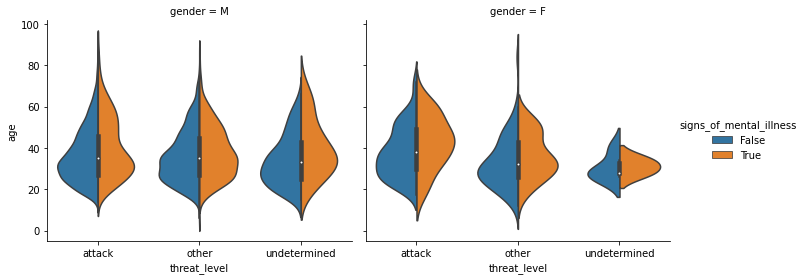

In [ ]:
#@title
c = data[['age','flee','signs_of_mental_illness','gender', 'threat_level']]
ax = sns.catplot(x="threat_level", y="age",
                hue="signs_of_mental_illness", col="gender",
                data=c, kind="violin", split=True,
                height=4, aspect=1.2)
plt.show()

### **Age vs. flee attempts**
* Younger flee people - tends to flee by foot
* Unknown method of flee (e.g. - initally missing data), is similar to "not fleeing", suggesting that missing reports of fleeing is probably associated with not fleeing.

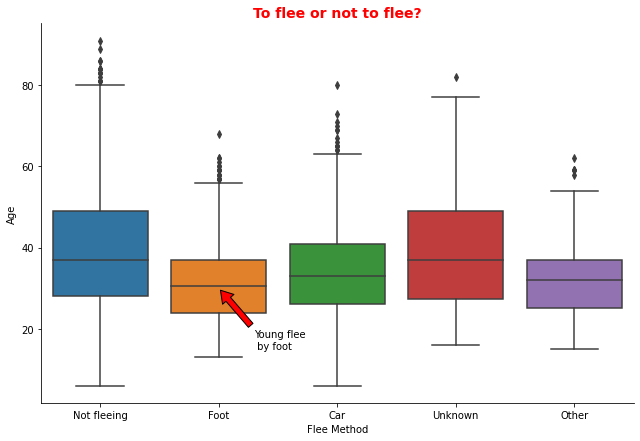

In [ ]:
#@title  { form-width: "1%" }
a = data[['age','threat_level','flee','gender']]
ax = sns.catplot(x='flee', y="age", kind="box", data=a, height=6, aspect=1.5)
ax.set(xlabel='Flee Method', ylabel='Age')
plt.title('To flee or not to flee?', fontdict={'size': 14, 'color':'red', 'weight': 'bold'})
x = 1
y = 30
plt.annotate('Young flee\n by foot', xy=(x,y), xytext=(x+0.3, 15), annotation_clip=False,
             arrowprops=dict(facecolor='red', shrink=0.05, headwidth=15, width=6))
plt.show()

###**Race vs. body camera?**
* While camera is off: White ~ 46%, Black ~ 22.6%
* While camera is on: White ~ 37.6%, Black ~ 32.6%
> It is reasonable to believe that when a police officer meets a black person, the body camera is turned on...

In [ ]:
#@title  { form-width: "1%" }
# Seperating the data according to body camera
nm = data[data['body_camera']== True].groupby('race')['name'].count()  # 644 records
orig = data[data['body_camera']== False].groupby('race')['name'].count()  # 4851 records
y1 = nm.div(nm.sum())*100
y1.index = ['Asian', 'Black', 'Hispanic', 'Native', 'Other', 'Unknown', 'White']
y2 = orig.div(orig.sum())*100
y2.index = ['Asian', 'Black', 'Hispanic', 'Native', 'Other', 'Unknown', 'White']

# HTML code to display in colab notebook
html_pygal = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {pygal_render}
    </figure>
  </body>
</html>
"""
# plotting a dot chart with pygal
dot_chart = pygal.Dot(x_label_rotation=30, height=300,show_legend=False, 
                      print_values=False,
                      print_values_position='top',
                      human_readable=True)
dot_chart.title = 'Race effecting Body Camera presence?'
dot_chart.x_labels = y1.index
dot_chart.add('Camera = True', y1.to_list())
dot_chart.add('Camera = False', y2.to_list())
display(HTML(html_pygal.format(pygal_render=dot_chart.render())))

###**Threat Level vs. Armed Category**
* Declining percentage of 'hot' weapon according to threat level
* Increase in 'Cold' and 'Unarmed' according to threat level
> There is a linear correlation between Threat Level and the armed category

In [ ]:
#@title  { form-width: "1%" }
undeter = data[data['threat_level'] == 'undetermined'] # 244 records
other = data[data['threat_level'] == 'other'] # 1698 records
attack = data[data['threat_level'] == 'attack'] # 3553 records

a1 = undeter.groupby('Hot_Cold_weapon')['name'].count()#.to_frame()
y1 = a1.div(a1.sum())*100

a2 = other.groupby('Hot_Cold_weapon')['name'].count()#.to_frame()
y2 = a2.div(a2.sum())*100

a3 = attack.groupby('Hot_Cold_weapon')['name'].count()#.to_frame()
y3 = a3.div(a3.sum())*100

a4 = data.groupby('Hot_Cold_weapon')['name'].count() # 5495 records
y4 = a4.div(a4.sum())*100

line_chart = pygal.Bar(height=300,show_legend=True,
                      legend_at_bottom = True, 
                      print_values=True,
                      print_values_position='center',
                      value_formatter=lambda x: '{:2.2f}%'.format(x),
                      rounded_bars=10,
                      style=LightSolarizedStyle(
                             value_font_size=12,
                             value_colors=('white','white','white','white')))
line_chart.title = 'Threat Level vs. Armed Category'
line_chart.x_labels = ['COLD', 'HOT', 'UNARMED']
line_chart.add('Immediate Threat (n=3,553)', y3)
line_chart.add('Medium Threat (n=1,698)', y2)
line_chart.add('Unknown Threat (n=244)', y1)
# line_chart.add('All (n=5,495)',  y4)
display(HTML(html_pygal.format(pygal_render=line_chart.render())))

# **Summary**

This notebook presents links between different attributrs, personal observations and interpertations according to our understaning.

Many other links were checked and excluded since it didn't donate sugnificant insights.

There are some insights that stand out of the EDA process, among them:
* The decline in total number of deaths in 2016 is unclear. We suggest it may be related to the national election and the police state-of-mind that time. This could be further checked in the elections to come.
* Normalizing the casualties' race to the population prevalence, there is a significant undeniable bias towards the 'Black' minority.
* The use of a Teaser-gun is lower than expected, and the use of a gun seems to primarly be the first choice.
* Normalizig the data according to population, the south & south-west states are more prone to shooting incidents to a wider degree.
* There is a countinious decline of the percentage of incidents involving victims with signs of mentall illnes.
* As a rule, women are only 4.4% of the annual incidents, and mainly - white woman.

Looking forward - 
* This data is only half the story. Police officers are also killed on duty, sometimes in the same event a citizen is killed. We couldn't locate a dataset with police officers deaths, but a further comprehensive EDA is recommended if possible.
* Exploring the data of this dataset at a single state or city level, looking for trends and explain it with domestic changes (e.g. unemployment rate, investments in education and so on), may lead to a better understanding of the federal data and may set a course to a better future.
